In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *
import statistics

In [2]:

# df = pd.read_csv('../(Data) Last Year/training/prices_round_1_day_0.csv', delimiter=';')
# df = pd.read_csv('../(Data) Last Year/training/prices_round_3_day_0.csv', delimiter=';')
# df = pd.read_csv('5860.csv', delimiter=';')
# df = pd.read_csv('archive/profit_4600.csv', delimiter=';')
df = pd.read_csv('look.csv', delimiter=';')
df.fillna(0, inplace=True)

In [3]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,ROSES,14421,30,14420.0,42.0,0.0,0.0,14422,72,0.0,0.0,0.0,0.0,14421.5,0.000000
1,2,0,STRAWBERRIES,4036,181,0.0,0.0,0.0,0.0,4037,181,0.0,0.0,0.0,0.0,4036.5,0.000000
2,2,0,AMETHYSTS,9996,2,9995.0,25.0,0.0,0.0,10004,2,10005.0,25.0,0.0,0.0,10000.0,0.000000
3,2,0,ORCHIDS,1053,7,1052.0,2.0,1046.0,46.0,1059,7,1060.0,2.0,1067.0,46.0,1056.0,0.000000
4,2,0,STARFRUIT,5023,1,5022.0,27.0,0.0,0.0,5029,27,0.0,0.0,0.0,0.0,5026.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2,99900,AMETHYSTS,9998,3,9996.0,1.0,9995.0,20.0,10004,1,10005.0,20.0,0.0,0.0,10001.0,1289.000000
6996,2,99900,STRAWBERRIES,4042,274,0.0,0.0,0.0,0.0,4044,274,0.0,0.0,0.0,0.0,4043.0,-29696.000000
6997,2,99900,STARFRUIT,5011,7,5010.0,21.0,0.0,0.0,5017,21,0.0,0.0,0.0,0.0,5014.0,900.804688
6998,2,99900,ROSES,14405,64,0.0,0.0,0.0,0.0,14407,64,0.0,0.0,0.0,0.0,14406.0,-27459.250000


In [4]:
df.columns.to_list()

['day',
 'timestamp',
 'product',
 'bid_price_1',
 'bid_volume_1',
 'bid_price_2',
 'bid_volume_2',
 'bid_price_3',
 'bid_volume_3',
 'ask_price_1',
 'ask_volume_1',
 'ask_price_2',
 'ask_volume_2',
 'ask_price_3',
 'ask_volume_3',
 'mid_price',
 'profit_and_loss']

Text(0, 0.5, 'Profits')

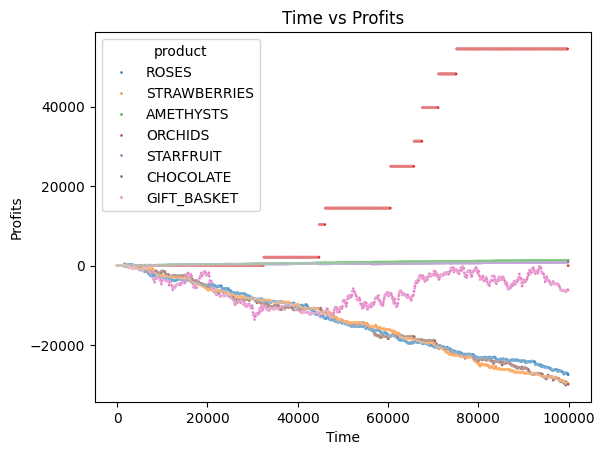

In [6]:
sns.scatterplot(data=df, x='timestamp', y='profit_and_loss', hue='product', s = 4)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')


Text(0, 0.5, 'Profits')

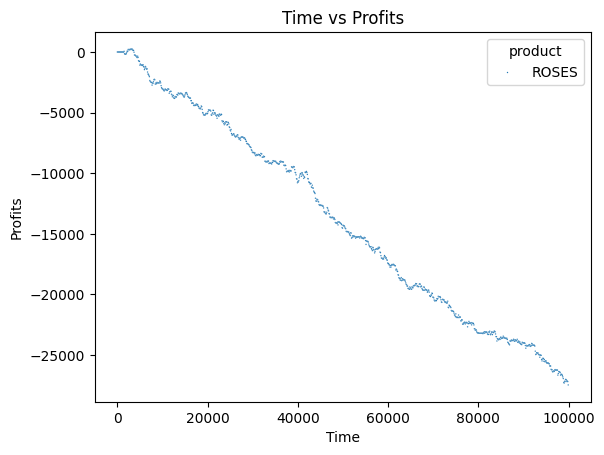

In [14]:
sns.scatterplot(data=df[df['product'] == 'ROSES'], x='timestamp', y='profit_and_loss', hue='product', s = 1)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')


Text(0, 0.5, 'Mid Price')

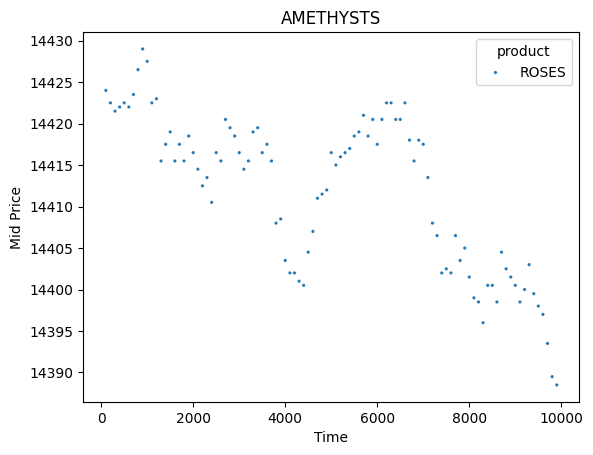

In [11]:
sns.scatterplot(data=df[df['product'] == 'ROSES'].iloc[1:100], x='timestamp', y='mid_price', hue='product', s = 6)
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [ ]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'], x='timestamp', y='mid_price', hue='product', s = 20)
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [ ]:
sns.scatterplot(data=df[df['product'] == 'ORCHIDS'], x='timestamp', y='mid_price', hue='product', s = 20)
plt.title('ORCHIDS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [ ]:
sns.scatterplot(data=df[df['product'] == 'AMETHYSTS'].iloc[10:100], x='timestamp', y='mid_price', hue='product', s = 10, palette=['#fa8825'])
for i in range(10, 100, 1):
    x_new = []
    minus = -1400
    for _ in range(15):
        x_new.append(time[i] + minus)
        minus += 100
    # x_1 = time[i]-100
    # x_2 = time[i]-200
    # x_3 = time[i]-300
    # x_new = [x_3, x_2, x_1, time[i]]
    # c, m = lin_reg(np.array(x_new), np.array(gradient_lst[i]))
    m, c = np.polyfit(x_new, gradient_lst[i], 1)
    y = m * np.array(x_new) + c
    # print(gradient_lst[i])
    plt.plot(x_new, y)
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.show()


In [ ]:
len(time)

In [ ]:
df_star = df[df["product"] == "BERRIES"]
df_star = df_star.reset_index()

In [ ]:
df_star

In [8]:
def find_average(row):
    try:
        return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
    row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
    row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                    row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])
    except:
        return 0

df['avg_price'] = df.apply(find_average, axis=1)

Text(0, 0.5, 'Mid Price')

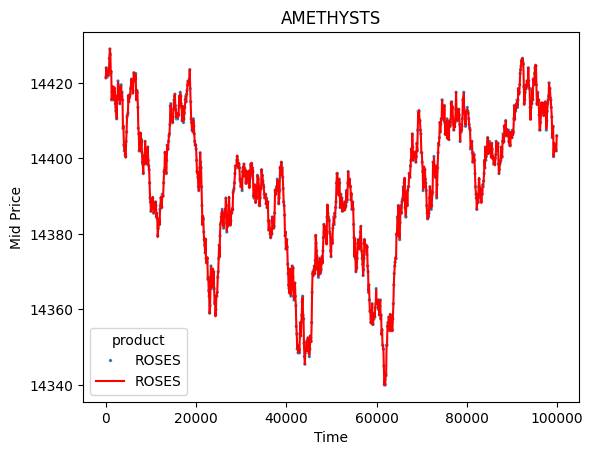

In [25]:
sns.scatterplot(data=df[df['product'] == 'ROSES'], x='timestamp', y='mid_price', hue='product', s = 6)
sns.lineplot(data=df[df['product'] == 'ROSES'], x='timestamp', y='avg_price', hue='product', palette=['r'])
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [ ]:
def lin_reg(x, y):
        # number of observations/points
        n = np.size(x)
        
        # mean of x and y vector
        m_x = np.mean(x)
        m_y = np.mean(y)
        
        # calculating cross-deviation and deviation about x
        SS_xy = np.sum(y*x) - n*m_y*m_x
        SS_xx = np.sum(x*x) - n*m_x*m_x
        
        # calculating regression coefficients
        b_1 = SS_xy / SS_xx
        b_0 = m_y - b_1*m_x
        
        return (float(b_0), float(b_1))

In [ ]:
def check_validity():
    # success_lst = []
    # for test in range(2, 20):
    past_vals = 15
        
    df_star = df[df["product"] == "STARFRUIT"]
    df_star = df_star.reset_index()
    print(df_star)
    success = 0
    lst = np.array([])
    x = np.array([i for i in range(past_vals)])
    time = []
    gradient_lst = []
    for index, row in df_star.iterrows():
        if index == 1999:
            break
        curr_avg = row["avg_price"]
        curr_mid = row["mid_price"]
        next_mid = df_star.iloc[index+1]["mid_price"]

        if len(lst) < past_vals:
            lst = np.append(lst, curr_avg)
            continue
        else:
            lst = lst[1:]
            lst = np.append(lst, curr_avg)
            
        
        gradient, c = np.polyfit(x, lst, 1)
        time.append(row["timestamp"])
        gradient_lst.append(lst.tolist())

        if len(lst) >= past_vals:
            diff_lst = []
            for i in range(past_vals):
                c_avg = df_star.iloc[index-i]["mid_price"]
                c_lin_reg = gradient * (past_vals - i) + c
                diff = c_lin_reg - c_avg
                diff_lst.append(diff)


            sd = statistics.stdev(diff_lst, 0)
        else:
            sd = 1
        # df["lin_reg_avg_price"] = df
        # print(c, gradient)
        # predicting a down trend
        # if curr_avg - curr_mid < 0:
        pred = (past_vals+1) * gradient + c
        pred = float(round(pred * 2) / 2)
        # give a buffer
        # print(f"pred: {pred}, next_mid: {float(next_mid)}")
        print(f"sd: {sd}")
        if next_mid < (pred + 0.9 * sd) and next_mid > (pred - 0.9 * sd):
            print(f"pred: {pred}, next_mid: {next_mid}")
            success += 1

        # if pred == next_mid:
        #     success += 1

            # if gradient < 0:
            #     if next_mid < curr_mid:
            #         success += 1
            
            # # if curr_avg - curr_mid > 0:
            # if gradient > 0:
            #     if next_mid > curr_mid:
            #         success += 1
        # success_lst.append(success)
        # print(test)
        # return success
        
    
    # return gradient_lst, time
    return success
# time, gradient_lst = check_validity()
# gradient_lst, time = check_validity()
success = check_validity()

In [ ]:
success/2000

In [ ]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[100:150], x='timestamp', y='mid_price', hue='product', s = 10, palette=['#fa8825'])
for i in range(100, 150, 1):
    x_new = []
    minus = -1400
    for _ in range(15):
        x_new.append(time[i] + minus)
        minus += 100
    # x_1 = time[i]-100
    # x_2 = time[i]-200
    # x_3 = time[i]-300
    # x_new = [x_3, x_2, x_1, time[i]]
    c, m = lin_reg(np.array(x_new), np.array(gradient_lst[i]))
    y = m * np.array(x_new) + c
    print(f"new: {x_new}, grad: {gradient_lst[i]}")
    print(y)
    plt.plot(x_new, y)
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.show()

In [ ]:
print(sum([df.loc[3995, 'bid_volume_1'], df.loc[3995, 'bid_volume_2'], df.loc[3995, 'bid_volume_3'], df.loc[3995, 'ask_volume_1'], df.loc[3995, 'ask_volume_2'], df.loc[3995, 'ask_volume_3']]))

In [ ]:
df[df['product'] == 'STARFRUIT'].to_csv('starfruit_my_trades.csv', index = False)

In [ ]:
df.replace(0, np.nan, inplace=True)

In [ ]:
lowest_ask = df[["ask_price_1", "ask_price_2", "ask_price_3"]].min(axis=1)

highest_bid = df[["bid_price_1", "bid_price_2", "bid_price_3"]].min(axis=1)

spread = lowest_ask - highest_bid

df['spread'] = spread

In [ ]:
sns.scatterplot(data=df, x='timestamp', y='spread', hue='product', s = 2)
plt.title('Spread')
plt.xlabel('Time')
plt.ylabel('Price')

## Finding EMA

In [ ]:


def calculate_ema(col_name: str, time = 3):
    for product in df['product'].unique():
        df[col_name + f"_{product}"] = df[df['product'] == str(product)]['mid_price'].ewm(span = time, adjust = False).mean()
    # return df[df['product'] == product]


In [ ]:
# df_star = calculate_ema(product= "STARFRUIT", col_name="ema3")
calculate_ema(col_name="ema3", time=3)
calculate_ema(col_name="ema7", time=7)
calculate_ema(col_name="ema20", time=20)
calculate_ema(col_name="ema100", time=100)

In [ ]:
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema3_AMETHYSTS', label='ema3')
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema100_AMETHYSTS', label='ema100')
sns.scatterplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 2, palette=['#000000'])
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

In [ ]:
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema20_STARFRUIT', label='ema20', linewidth=1)
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema100_STARFRUIT', label='ema100', linewidth=1)
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 1, palette=['#000000'])
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

In [ ]:
trade_df = convert_to_pandas("scripts/testMM.log")

In [ ]:
trade_df["timestamp"] = trade_df["timestamp"] / 100
trade_df.set_index('timestamp', inplace=True)

In [ ]:

sns.barplot(data=trade_df[trade_df['product'] == 'STARFRUIT'].loc[1300: 1380], x='timestamp', y='position', label = "position")
ax2 = plt.twinx()
# sns.barplot(data=trade_df[trade_df['product'] == 'AMETHYSTS'].iloc[100:], x='timestamp', y='price', color="r", ax=ax2, label = "price")

plt.legend(loc='upper left')

In [ ]:
len(trade_df) # the amount of trades that have gone thru

In [ ]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[1330: 1350], x='timestamp', y='profit_and_loss', hue='product', s = 5)

In [ ]:
df[df['product'] == 'STARFRUIT']["mid_price"].iloc[1337]

In [ ]:
trade_df[df['product'] == 'STARFRUIT']["price"].loc[1330 : 1400]

In [ ]:

sns.barplot(data=trade_df[trade_df['product'] == 'AMETHYSTS'].loc[830: 1050], x='timestamp', y='position', label = "position")
ax2 = plt.twinx()
# sns.barplot(data=trade_df[trade_df['product'] == 'AMETHYSTS'].iloc[100:], x='timestamp', y='price', color="r", ax=ax2, label = "price")

plt.legend(loc='upper left')

In [ ]:
sns.scatterplot(data=df[df['product'] == 'A'].iloc[750: 850], x='timestamp', y='profit_and_loss', hue='product', s = 5)